# CYPLAN255
### Urban Informatics and Visualization

# Lecture 07 -- Scientific Computing in Python
*******
February 12, 2024

<img src="https://i.redd.it/nmx3oz11h8191.jpg" title="Children in a traditional minobashi raincoat going to a new year's event, Niigata prefecture, Japan 1956 [700 x 1041]">

# Agenda
1. Announcements
2. Scientific Computing in Python
3. Intro to Data Analysis
4. For next time
5. Questions


# 1. Announcements

1. Assignment 2 released tonight
2. Github Pages workshop with Meiqing

# 2. Scientific Computing in Python

> _"Scientific computing is the collection of **tools**, **techniques**, and **theories** required to solve on a computer **mathematical models** of **problems in Science and Engineering**"_

<p style='text-align: right;'>-- Gene H. Golub and James M. Ortega. <br><i>Scientific Computing and Differential Equations – An Introduction to Numerical Methods</i>. Academic Press, 1992.</p>

## 2.1 Motivating Example: "Brute Force" Data Analysis in Python

Let's use the methods we learned to iterate through the rows of a file in order to process each row, one at a time.  We will load it via the `csv` library and open the file and iterate through the rows to compute the `mean`, `max`, and `min` values of rainfall.

### 2.1.1 Row-based iteration

In [1]:
import csv

with open('data/rain.csv', 'r') as csvfile:  # this is how you open a file in Python
    
    # initialize a counter and variables to contain our descriptive stats
    count = 0  # at the end, divide cumulative_sum by this to get the mean
    cumulative_sum = 0  # our rolling sum
    max_value = -1  # pick a really small number that's guaranteed to be less than the max
    min_value = 1000
    
    # open the file and skip the header row
    my_csv = csv.reader(csvfile)
    next(my_csv)
    
    # loop through each data row
    for row in my_csv:
        
        # rainfall amount is in column 1, only process this row's value if not an empty string
        if not row[1] == '':
            
            # increment the counter and extract this row's rainfall as a float
            count = count + 1
            rainfall = float(row[1])
            
            # add this row's rainfall to the cumulative sum
            cumulative_sum = cumulative_sum + rainfall
            
            # if this row's rainfall is greater than the current max value, update with the new max
            if rainfall > max_value:
                max_value = rainfall

            # if this row's rainfall is less than the current min value, update with the new min    
            if rainfall < min_value:
                min_value = rainfall

    # after looping through all the rows, divide the cumulative sum by the count and round to get the mean
    mean_value = round(cumulative_sum / count, 1)
    
    # print out the mean and max values
    print('mean:', mean_value, 'inches')
    print('max:', max_value, 'inches')
    print('min:', min_value, 'inches')

mean: 3.7 inches
max: 5.9 inches
min: 0.7 inches


### Question 1
Can you think of a straightforward way to get the median value of rainfall?

### 2.1.2 List-based iteration

Some things that are hard in the row-based iteration approach above become easier if we can store all of the values in one object, like a list.

Let's try to reimplement a cleaner version of what we did above by appending the values from each row into a single list, and then performing the calculations we want on the list.

In [2]:
with open('data/rain.csv', 'r') as csvfile:
    x = []
    itemreader = csv.reader(csvfile)
    
    # Skip the header row
    next(itemreader)
    for row in itemreader:
        
        # keep only non-missing values
        if row[1] != '':
            x.append(float(row[1]))

In [3]:
x

[5.3, 5.4, 4.8, 4.7, 3.3, 1.2, 0.8, 0.7, 3.9, 4.5, 5.9]

X is now a single list object with all the values in the file, whereas initially we just had each row producing one list with one element in it (from one row), and then printing that, before recreating it with the value from the next row.  The iteration approach kept only one row at a time, and we could not easily do calculations like a median.

Using the list (x), we should now have an easier time with mean and median calculations, using list methods like sum and len, and sort:

In [4]:
mean_x = round(sum(x) / len(x), 1)
print(mean_x)

3.7


In [5]:
x.sort()
print(x)

[0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9]


### Question 2
How can we print the value that is halfway through the list? (Tip: use `int()` and `len()` functions)

It is also simple to get the min and max, using built-in list indexes to get the first and last element from the sorted list:

In [6]:
min_x = x[0]
min_x

0.7

In [7]:
max_x = x[-1]
max_x

5.9

OK, this is progress.  Can we now do other math on the data, like multiply each value by 5?

In [8]:
y = x * 5
print(y)

[0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9]


Not what we wanted. That just concatenated 5 copies of the list together! Let's try a different approach.

In [9]:
y = []
for item in range(len(x)):
    y.append(x[item] * 5)
y

[3.5, 4.0, 6.0, 16.5, 19.5, 22.5, 23.5, 24.0, 26.5, 27.0, 29.5]

Alright, this is a big improvement over the iteration-by-rows approach, but it still a bit tedious, especially if we had a much larger list of items.

### 2.1.3 Vectorization: an Alternative to Iteration

**Vectorization** is a more computationally efficient approach to performing repeated operations over a sequence of data. Rather than having Python perform an operation on one item at a time until it reaches the end of the sequence, we can tell Python to do it all at once. This is vast oversimplification of what's actually going on behind the scenes when we employ vectorization, but its close enough.

In Python, vectorization is made possible through the use of a data type called an `array`, which is defined by the NumPy library. We'll take a closer look at NumPy arrays in a minute, but for now let's admire how they allow us to perform the same exact analysis we just did without ever having to use a for loop:

In [10]:
import numpy as np

rain = np.array(x)
print(round(np.mean(rain),1))
print(np.median(rain))
print(np.min(rain))
print(np.max(rain))
print(rain * 5)

3.7
4.5
0.7
5.9
[ 3.5  4.   6.  16.5 19.5 22.5 23.5 24.  26.5 27.  29.5]


Much easier than coding for loops and counters, don't you think?  And a lot faster on large datasets, too. In addition to vectorization, NumPy provides us with access to more complex mathematical operations like variance and standard deviation, and integrates nicely with the most common plotting libraries you'll use in Python.

Let's look at a sorted list of the elements in the array as a percentage of total rainfall.

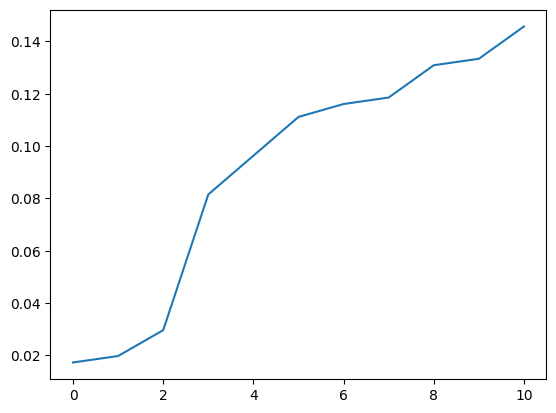

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.sort(rain) / np.sum(rain))

## 2.2 The Python Scientific Stack

NumPy and Matplotlib are key components of what is commonly referred to as the **Python Scientific Stack**, which includes:

- NumPy
- SciPy
- Matplotlib
- Scikit-learn
- IPython
- pandas
- Jupyter
- Dask
- NetworkX
- Ray

## 2.3 NumPy Arrays

The **array** is the data type which underpins all nearly all scientific computing in Python. Arrays are formally defined in the **NumPy** library, and since NumPy is not a built-in module (like `math` for example), the `array` is not a built-in data type. This means we have to install NumPy and then import it in order to use it and its many methods. Fortunately, the version of Python you installed from Anaconda came with NumPy pre-installed, so the following `import` statement should work without you having to do anything more.

In [12]:
import numpy as np  # we "alias" numpy with "np" to make it easier to call it later

If Python tells you that it can't find the NumPy module when you run the cell above, you'll have to install it yourself. To do that, use the following instructions:

1. Open up a bash terminal
2. Activate the right conda environment using `conda activate <env name>`. By default this is `base`.
3. Run `conda install numpy`
4. Restart your Juypter Notebook

### Question 3

What's the difference between `Install` and `Import` for libraries in Python? 

### 2.3.1 Install vs Import

Nearly all of the Python libraries for scientific computing are designed to work with arrays. This makes NumPy a **dependency** of each of them. In other words, you cannot import those other libraries unless you already have NumPy **installed** in your Python environment. This is because as soon as you do `import scipy` for example, SciPy is going to do `import numpy` behind the scenes. This means you do not need to import NumPy yourself everytime you want to use SciPy; it just needs to be _installed_.

### 2.3.2 Arrays vs. Lists

Arrays look a lot like `list` types, but don't be fooled: they are much more powerful. In general, an `array` allows you to _vectorize_ your calculations instead of iterating over a list and applying an operation element by element. Although they are convenient and readable, _for loops are very slow_. Especially when datasets are large, the **computational efficiency** gained by using vectorized calculations can be significant. In addition to speed, arrays are a convenient data structure for implementing the numerical methods from linear algebra and statistics which comprise the majority of applications of scientific computing applications used in data science.

Let's start by creating a list, and then creating an array from that list.  Then let's compare how the list of integers works compared to the array.

In [13]:
x = list(range(1, 6))
y = np.array(x)

In [14]:
x

[1, 2, 3, 4, 5]

In [15]:
y

array([1, 2, 3, 4, 5])

These two objects x and y look almost the same ... but they are not.

In [16]:
type(x)

list

In [17]:
type(y)

numpy.ndarray

Let's see how we can do math operations on these two versions of our data.

In [18]:
sum(x)

15

In [19]:
sum(y)

15

In [20]:
min(x)

1

In [21]:
min(y)

1

So far so good -- not easy to tell the difference between lists and arrays...but we haven't really gotten NumPy involved yet. Let's see how we might use NumPy to perform some operations beyond the simply min/max/sum.

In some cases, we can use a Numpy method and apply it to a list of numbers like we have in this case:

In [22]:
np.mean(x)

3.0

In [23]:
np.mean(y)

3.0

In [24]:
np.median(x)

3.0

In [25]:
np.median(y)

3.0

In [26]:

np.size(x)

5

In [27]:
np.size(y)

5

In [28]:
y / 10

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [29]:
x / 10

TypeError: unsupported operand type(s) for /: 'list' and 'int'

// p.s. vectorize operation will not work on this "x/10" example

When you apply the `/` operator to an `array`, NumPy knows that you want to divide each element rather than the array itself. Python will not make this same assumption for a `list` type. To perform the same operation on a list, we'd have to use iteration:


In [30]:
xscaled = [z / 10 for z in x]
print(xscaled)

[0.1, 0.2, 0.3, 0.4, 0.5]


For arrays/lists as small as these, the advantage of vectorization might not seem obvious. Maybe bigger objects and more complex operations might make it more clear:

In [31]:
x = list(range(1, int(1e6)))  # 1 million numbers
y = np.array(x)

In [32]:
%time xscaled = [(z ** 2)/ 10 for z in x]

CPU times: total: 219 ms
Wall time: 211 ms


In [33]:
%time yscaled = (y ** 2) / 10

CPU times: total: 0 ns
Wall time: 3.48 ms


p.s. the vectorize apporach (y) is much faster than the "for loop" (x)

### Question 4

How much faster is the vectorized approach than the list-based approach? Why is it so? 

Solution:

list-based approach = 
CPU times: total: 250 ms
Wall time: 243 ms

vectorized approach = 
CPU times: total: 0 ns
Wall time: 3.42 ms

### 2.3.3 Working with Arrays

The easiest ways to create arrays:
1. Convert a list:
```
np.array([1, 2, 3])
```
2. Initialize an array of the shape you want filled with all zeros or all ones:

In [34]:
Z = np.zeros(10)
Z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

And we can set values in the arrays by index value -- meaning they are **mutable**.

In [35]:
Z[4] = 1
print(Z)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [36]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Arrays are not always simple one-dimensional arrays like a column in a spreadsheet.  They could be 2 dimensional like a table, or 3 dimensional like a set of tables, or many dimensional.

### //you could have n dimentional array !!!

In [37]:
Z = np.arange(9).reshape(3, 3)
Z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
type(Z)

numpy.ndarray

### Question 5
What do we get with the following line of code? How can we sum up row or column values? 

#### format: matrix [row, column]

In [39]:
Z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [40]:
Z[:, 2]  # all rows' second column

array([2, 5, 8])

In [41]:
np.sum(Z[:, 2])

15

`np.arange()`? `np.reshape()`?

Of course if you have a 2-dimensional array, your indexing into the array becomes two dimensional as well, with row, then column index values:

In [42]:
Z[0, 2] = 9
Z

array([[0, 1, 9],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
Z.shape

(3, 3)

In [44]:
Z.size

9

You might or might not have noticed that when we do calculations on arrays like adding two arrays together, the default behavior is element by element.  Look at the result of adding Z to itself:

In [45]:
Z + Z

array([[ 0,  2, 18],
       [ 6,  8, 10],
       [12, 14, 16]])

Or multiplying it by itself:

In [46]:
Z * Z

array([[ 0,  1, 81],
       [ 9, 16, 25],
       [36, 49, 64]])

In [47]:
Z.dot(Z) # matrix operation

array([[ 57,  67,  77],
       [ 42,  54,  87],
       [ 69,  90, 153]])

In this example we create a 10 x 10 array of random numbers and find the min and max of the array:

In [48]:
Z = np.random.randint(0, 100, (10, 10))
Zmin, Zmax = Z.min(), Z.max()
print(Zmin, Zmax)

0 97


Some NumPy operations are available as array instance methods. But others are only defined as NumPy functions, like median and percentile

In [49]:
print(np.mean(Z))  # function
print(Z.mean())  # method # //instance method

54.05
54.05


In [50]:
print(np.median(Z))

58.0


In [51]:
print(Z.median())

AttributeError: 'numpy.ndarray' object has no attribute 'median'

Remember this example from the first class?  It was using Numpy arrays and the Matplotlib library for plotting.

In [52]:
import matplotlib.pyplot as plt

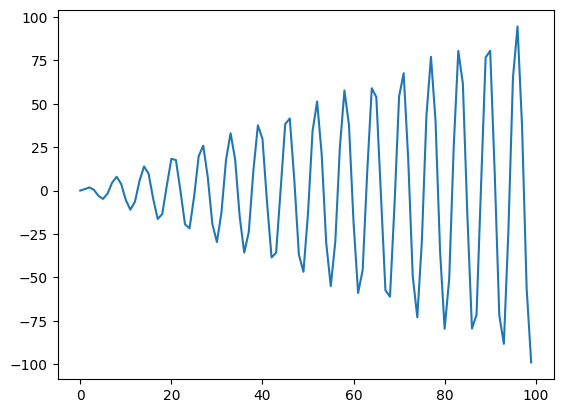

In [53]:
x = range(100)
y = np.sin(x)
plt.plot(x * y)

### 2.3.4 Numpy for Linear Algebra

If you have used a program like Matlab, R, Gauss, Octave or any other matrix - based language for doing linear algebra or statistics, this is not what you expect.  Instead, multiplying two matrices would be expected to produce a dot product, or matrix multiplication.  NumPy can do that too, but it just uses a different syntax:

In [54]:
Z = np.arange(9).reshape(3, 3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [55]:
Z.dot(Z)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

You can also do a matrix transpose (switching axes):

In [56]:
np.array_equal(np.transpose(Z), Z.T)

True

And easily compute an identity matrix:

In [57]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Question 6
What is the difference between `Z * Z` and `Z.dot(Z)`?

### 2.3.5 NumPy Summary

NumPy is a very powerful multi-dimensional array processing library for Python, and it is very fast because the underlying implementation is actually in the C programming language.

The Scientific Python ecosystem we will be using in this course uses NumPy heavily, but usually it is "under the hood", and we use it through the Pandas library which makes it much easier to use and to handle data as tables.  But you might find significant value in learning more about NumPy if you need lower level functionality or want to code something very computationally intensive. It is not expected that you use it heavily in this course, however.

As we will learn later in the course, we can use the NumPy multi-dimensional array library and other libraries built on it to do statistical analysis and machine learning. NumPy solves one of the main limitations of the Python language, which is that it is very slow at iterating or looping through calculations once the size of the data becomes large. But NumPy does those same operations very efficiently by using vectorized computation. For example, it multiplies two arrays all at once rather than looping through each row and multiplying the elements.

### 2.3.6 Exercise

Now do some experimenting with Numpy to get more familiar with it:

- Try creating a 100 x 100 element array with random numbers

- Multiply those by 2

- Calculate the 75% percentile value of the array

- Calculate minimum, maximum, median, and 10th and 90th percentile values


## 2.4 Graphing with `matplotlib`
The `matplotlib` library includes a variety of functions that allow us to build plots of data. There are lots of different data viz libraries in Python we'll be exploring later, but most of them are built on top of Matplotlib (kind of like NumPy for data analysis).

 Once again, you must first import the library before you can use it.

In [58]:
import matplotlib.pyplot as plt  # import matplotlib

Before you can use the plotting functions, you must first have some data to plot. Below are some data on Berkeley restaurants taken from Yelp.

In [59]:
restaurants = ["Gypsy's", "Tacos Sinaloa", "Sliver", "Muracci's", "Brazil Cafe", "Thai Basil"]   # <-- Are these still open?
rating = [4, 4, 4, 3.5, 4.5, 3.5]
number_of_ratings = [1666, 347, 1308, 294, 1246, 904]

You may be interested in seeing if there is a relationship between the number of ratings a restaurant has and their rating out 5 stars. It is difficult to determine this from looking at the numbers directly, so a plot can come in handy.

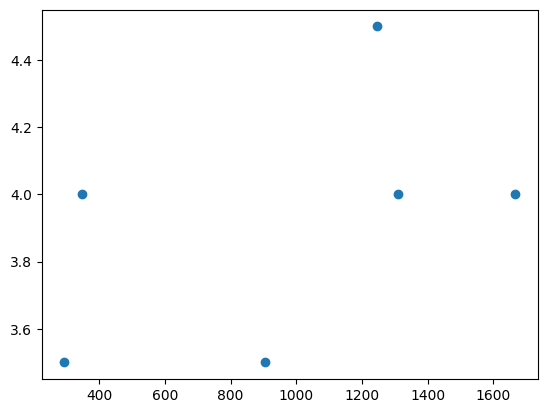

In [60]:
plt.scatter(number_of_ratings, rating)  # create a scatter plot
plt.show()  # show the plot

Out of context, this plot is not very helpful because it doesn't have axis labels or a title. These components can be added using other `matplotlib` functions.

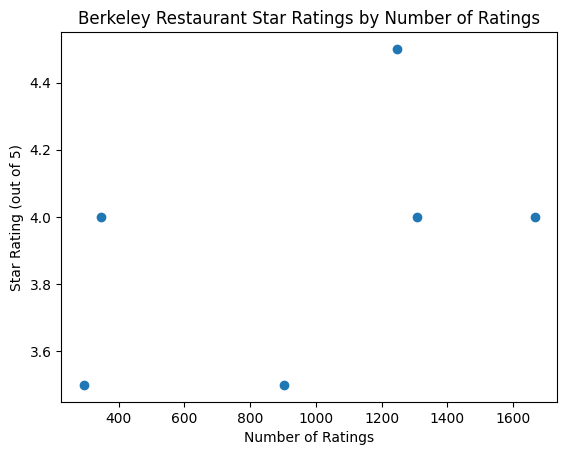

In [61]:
plt.scatter(number_of_ratings, rating)  # create a scatter plot
plt.xlabel("Number of Ratings")  # add the x-axis label
plt.ylabel("Star Rating (out of 5)")  # add the y-axis label
plt.title("Berkeley Restaurant Star Ratings by Number of Ratings")  # add a title
plt.show()  # show the plot

There are many other attributes you can add to plots and many more types of plots you can create using this library. For a comprehensive description, visit the [documentation](https://matplotlib.org/api/pyplot_api.html)! Included here are some basic plots that you may find useful for this class.

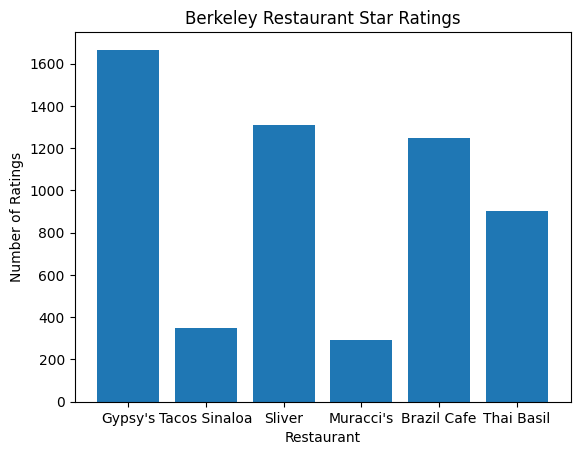

In [62]:
# create a bar plot
plt.bar(restaurants, number_of_ratings)

# add the x-axis label
plt.xlabel("Restaurant")

# add the y-axis label
plt.ylabel("Number of Ratings")

# add a title
plt.title("Berkeley Restaurant Star Ratings")

# show the plot
plt.show()

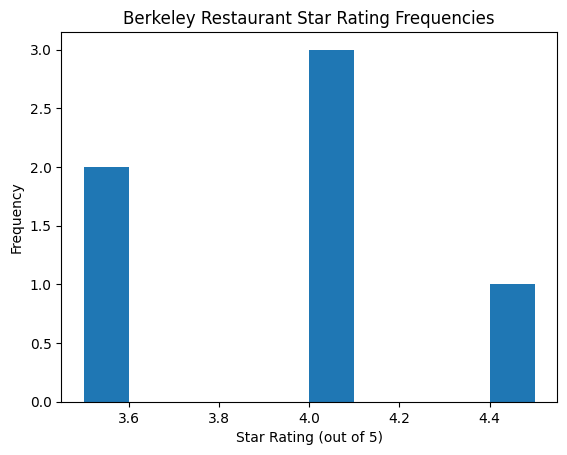

In [63]:
# create a histogram
plt.hist(rating)

# add the x-axis label
plt.xlabel("Star Rating (out of 5)")

# add the y-axis label
plt.ylabel("Frequency")

# add a title
plt.title("Berkeley Restaurant Star Rating Frequencies")

# show the plot
plt.show()

It is also possible to overlay multiple lines on a single plot. Below are some made up data about the number of people with each height in two different classes.

In [64]:
height = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
class_one = [1, 1, 0, 3, 7, 4, 3, 7, 8, 3, 1, 2, 1]
class_two = [0, 0, 3, 1, 3, 4, 1, 2, 6, 2, 8, 5, 2]

You can use the `.plot()` function to plot both of these functions as line plots. If you run multiple calls to plotting functions in the same cell, Python will simply layer the resulting plots on the same plot.

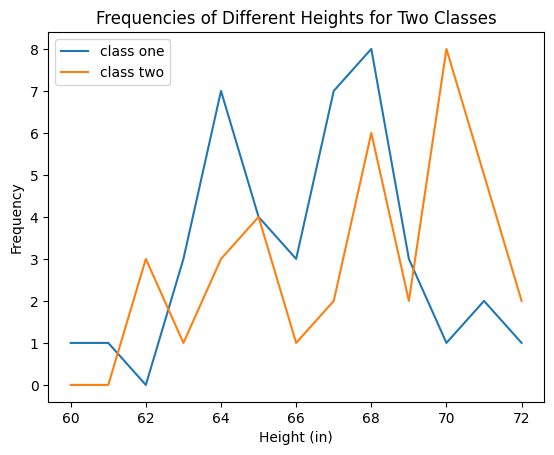

In [65]:
# create a line plot for the first class
# label this line as class one for the legend
plt.plot(height, class_one, label = "class one")

# create a line plot for the second class
# label this line as class two for the legend
plt.plot(height, class_two, label = "class two")

# add the x-axis label
plt.xlabel("Height (in)")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("Frequencies of Different Heights for Two Classes")

# show the plot
plt.show()

## 2.5 Intro to pandas

`pandas` is the most popular library for doing data analysis in Python. The Wes McKinney book you've been reading is basically just a guide to Pandas. I wince every time I have to say the word "pandas" because I think it's a dumb name, but I wind up having to wince a lot because it is so fundamental to what I use Python for on a day-to-day basis.

Just like NumPy, we'll import pandas and give it the alias `pd`. This is just convention. You could give it any alias you like, or no alias at all.

In [66]:
import pandas as pd

### 2.5.1 The `pandas` data types


The pandas library provides us with two new data types, both of which are built on the NumPy `array`:
1. `pandas.Series`: a 1d named array with a named index.
2. `pandas.DataFrame`: a 2d array (table) of `pandas.Series` columns which share a named index.

`Series` objects are basically dictionaries, where the keys are now an index and the values are an array of all the same type. A `DataFrame` is like a table where the values are a 2d array or matrix and each column is comprised of a `Series`.

You can create a `Series` from a list or a DataFrame from a list of lists:

In [67]:
pd.Series(height, index=['person_' + str(i) for i in range(len(height))], name='height')

person_0     60
person_1     61
person_2     62
person_3     63
person_4     64
person_5     65
person_6     66
person_7     67
person_8     68
person_9     69
person_10    70
person_11    71
person_12    72
Name: height, dtype: int64

In [68]:
df = pd.DataFrame(
    [height, class_one, class_two],
    index=['height','class_one', 'class_two'],
    columns=['person_' + str(i) for i in range(len(height))]).T

In [69]:
df.head()

,height,class_one,class_two
person_0,60,1,0
person_1,61,1,0
person_2,62,0,3
person_3,63,3,1
person_4,64,7,3


### 2.5.2 Importing data

Typically, however, we'll create DataFrames by reading in data that is already in a tabular format, like a .csv. Let's look at our rain data again:

In [70]:
df = pd.read_csv('data/rain.csv')

In [71]:
df.head()

,month_2014,rainfall_inches
0,jan,5.3
1,feb,5.4
2,mar,4.8
3,apr,4.7
4,may,3.3


In [78]:
df.dtypes   # "strings belong to object"

month_2014          object
rainfall_inches    float64
dtype: object

Notice a few things that have happened here.

1. `pd.read_csv()` had enough built-in smarts to read the first row of the file as a header.
1. It then read all rows in the file at once to create a table of NumPy arrays.
1. It created an automatic unique index, beginning with zero.
1. It inferred the type of each variable from the data.

Let's explore this pandas `DataFrame` to learn some of its features. Note that a pandas Series is like one column of this DataFrame, coupled with its own index column. So the main difference between a Series and a DataFrame is that the latter has multiple columns. Columns can be of different data types, but within a column, must be consistent.

In [79]:
df.shape

(12, 2)

In [80]:
df.columns

Index(['month_2014', 'rainfall_inches'], dtype='object')

In [81]:
df.dtypes

month_2014          object
rainfall_inches    float64
dtype: object


We can select subsets of the rows by indexing, and select specific columns by their name:

In [82]:
df['rainfall_inches'][:6]

0    5.3
1    5.4
2    4.8
3    4.7
4    3.3
5    1.2
Name: rainfall_inches, dtype: float64

We can get all of our statistics on the rainfall_inches column in one short command:

In [83]:
df['rainfall_inches'].describe()

count    11.000000
mean      3.681818
std       1.923444
min       0.700000
25%       2.250000
50%       4.500000
75%       5.050000
max       5.900000
Name: rainfall_inches, dtype: float64

Notice how it silently handled the missing value for September and gave the correct statistical results?

You can also get these values 'a la carte'.  You might recognize that these are essentially NumPy functions which Pandas has provided access to.

In [84]:
df['rainfall_inches'].max()

5.9

In [85]:
df['rainfall_inches'].median()

4.5

In [86]:
df['rainfall_inches'].min()

0.7

Notice that there is some flexibility in syntax, with multiple ways to perform certain operations:

In [87]:
df['rainfall_inches'].min()

0.7

In [88]:
df.rainfall_inches.min()

0.7

In [89]:
np.min(df.rainfall_inches)

0.7

Pandas also provides access to some of the basic functionality of `matplotlib`:

<Axes: xlabel='month_2014'>

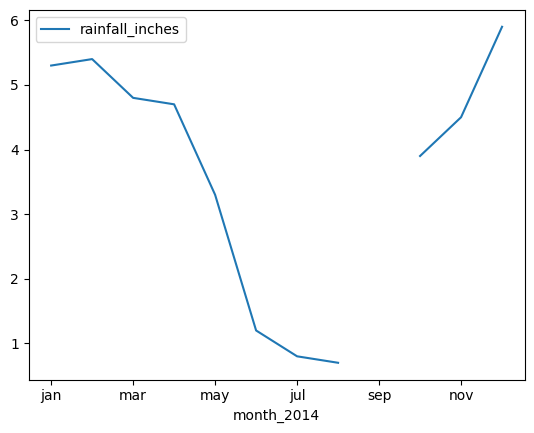

In [90]:
df.plot(y = 'rainfall_inches', x = 'month_2014')

### 2.5.3 Slicing and Selecting Data

#### 2.5.3.1 Indexing

pandas provides two indexing methods for getting slices of rows and columns from your data: `loc` and `iloc`. Both of them use the same square bracket notation you should be used to by now:

```
[<row index>, <column index>]
```

The `iloc` method lets you index a pandas `DataFrame` like indexing a 2d NumPy `array`, using integers to represent the _positions_ of rows and columns:


In [93]:
df.iloc[0:6, 0:2]   # treat as position # using integers

,month_2014,rainfall_inches
0,jan,5.3
1,feb,5.4
2,mar,4.8
3,apr,4.7
4,may,3.3
5,jun,1.2


The `loc` method lets us use the index _labels_ to get data.

In [94]:
df.loc[0:6, :'rainfall_inches']  # treat as label # using labels # index of "zero" to index of "six"

,month_2014,rainfall_inches
0,jan,5.3
1,feb,5.4
2,mar,4.8
3,apr,4.7
4,may,3.3
5,jun,1.2
6,jul,0.8


Since `loc` does not use positional indexing, notice how the rules of positional indexing do not apply.

That's right, label-based slicing is **endpoint inclusive**. More on this [here](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-endpoints-are-inclusive).

Sometimes it's useful to give your index a meaningful name

In [95]:
df.index.name = 'obs_id'
df.head()

,month_2014,rainfall_inches
obs_id,,
0,jan,5.3
1,feb,5.4
2,mar,4.8
3,apr,4.7
4,may,3.3


#### 2.5.3.2 Boolean Indexing (REALLY POWERFUL !!!)

You can easily filter rows of a dataframe by applying one or more boolean expressions to values in one or more columns. Below we filter `df` to select only months with less than 4 inches of rainfall.  

In [96]:
df[df['rainfall_inches'] < 4]

,month_2014,rainfall_inches
obs_id,,
4,may,3.3
5,jun,1.2
6,jul,0.8
7,aug,0.7
9,oct,3.9


Notice the nested use of df.  What happens if you don't do that? 

-> gives a series of boolean (above use these boolean as index)

In [98]:
df['rainfall_inches'] < 4

obs_id
0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9      True
10    False
11    False
Name: rainfall_inches, dtype: bool

You can also select rows based on the values of more than one column.  Just remember to nest the individual conditions within parentheses:

In [ ]:
df[(df['month_2014'] == 'jan') & (df['rainfall_inches'] > 5)]

pandas lets us get pretty fancy with our boolean expressions to extract exactly the data we want from our table.

For example, we can filter based on string matching:

In [ ]:
df[df['month_2014'].str.contains('j')]  # more on this later

We can filter out missing data:

In [ ]:
df[df['rainfall_inches'].notnull()]

Or do the opposite:

In [ ]:
df = df.reset_index()
df[df['obs_id'].isin([5,6,7])]

In [ ]:
df[df['rainfall_inches'].isnull()]

Let's say we know that the value for "sep" should be 2.5. We can use `loc` to perform assignment in pandas:

In [ ]:
df.loc[df['month_2014'] == 'sep', 'rainfall_inches'] = 2.5  # boolean row-index + label-based col index
df[df['rainfall_inches'].isnull()]

If we want to preserve this change, we can save the DataFrame to to disk as a new .csv:

In [ ]:
df.to_csv('data/rain_updated.csv', index=False)

### 2.5.4 String functions

We briefly saw an example of string matching above. pandas comes with a number of very powerful functions more operating on `str` type Series. Let's investigate them using some California Census data I've already prepared for you:

In [ ]:
census_df = pd.read_csv('data/ca_tracts_pop_cleaned.csv')

In [ ]:
census_df.head()

Let's create a new column, called "state", and populate it by getting the last element in the "geodisplay" field. This is a very common type of data processing you might need to do on data you acquire for your own projects.

In [ ]:
census_df['state'] = census_df['geodisplay'].str.split(',').str[2]
census_df.head()

We use the same approach to add a 'county' column to our dataframe, pulling the values from the geodisplay column.

In [ ]:
census_df['county'] = census_df['geodisplay'].str.split(',').str[1].str.replace(' County', '')
census_df.head()

Now let's see what the full list of unique county names is...

In [ ]:
census_df['county'].unique()

Now let's create a census tract column.

In [ ]:
census_df['Tract'] = census_df['geodisplay'].str.split(',').str[0].str.split().str[2]
census_df.head()

Could you have extracted the Tract number from the "GEOIDLONG" column instead?

In [ ]:
census_df['Tract'] = census_df['GEOIDLONG'].str[-6:-2] + '.' + census_df['GEOIDLONG'].str[-2:]
census_df.head()

Can you spot the difference?

### 2.5.5 More pandas operations

Let's go back to our rainfall data

**Summary stats**
pandas makes it really easy to quickly summarize and parse your data:

In [ ]:
df.head()  # first 5 rows

In [ ]:
df.sample(3)  # random 3 rows

In [ ]:
df.describe()

**Sorting**

In [ ]:
df.sort_values(['rainfall_inches'], ascending=False)

**Basic Aggregations**

In [ ]:
df['month_2014'].unique()

In [ ]:
df['month_2014'].count()

In [ ]:
df['month_2014'].value_counts()

Remember, DataFrames are just NumPy arrays with some frills on top. The `array` form is stored as an **attribute** of the DataFrame named "values":

In [ ]:
print(df.values)
print(type(df.values))

**Column selection**

You can also easily create a DataFrame from a dictionary. Let's follow an example from the Python for Data Analysis book:

In [ ]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
sp = pd.DataFrame(data)

Let's investigate the contents of `sp`:

In [ ]:
sp

In [ ]:
print(sp)

We can refer to a column in two ways:

In [ ]:
sp['state']

In [ ]:
sp.state

### Question 7
Generally it is preferable to be explicit and use the `df[<column name>]` approach. Can you imagine why?


What if we had a column named "values"? How could pandas distinguish between "values" the attribute and "values" the column?

**Iteration**

We can also iterate through the rows of a dataframes using `iterrows()`. This works a lot like list enumeration:

In [ ]:
for i, row in sp.iterrows():
    if row['state'] == 'Ohio':
        print(row['state'])
    else:
        print('Row {0} is not Ohio'.format(i))

<img src="https://i.kym-cdn.com/photos/images/original/001/733/249/7a0" alt="drawing" width="70%"/>

## 2.6 Exercises

### 2.6.1 Pandas expressions
Below are a series of questions, with the answers remaining for you to fill in by using pandas expressions.

Can you get a profile of a column that is not numeric, like state? Try it.

How can we print the data types of each column?

How can we print just the column containing state names?

How can we get a list of the states in the DataFrame, without duplicates?

How can we compute the mean of population across all the rows?

How can we compute the maximum population across all the rows?

How can we compute the 20th percentile value of population? 

How can we compute a Boolean array indicating whether the state is 'Ohio'?

How can we select and print just the rows for Ohio?

How can we create a new DataFrame containing only the Ohio records?

How can we select and print just the rows in which population is more than 2?

How could we compute the mean of population that is in Ohio, averaging across years?

How can we print the DataFrame, sorted by State and within State, by Population?

How can we print the row for Ohio, 2002, selecting on its values (not on row and column indexes)?

How can we use row and column indexing to set the population of Ohio in 2002 to 3.4?

### 2.6.2 COVID cases from NY Times

We end our intro to pandas with a quick look at how easy it is to load data into a dataframe. In this case, let's pull data from the New York Times online data for COVID cases, by county.

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
uscovid = pd.read_csv(url)

In [ ]:
uscovid.head()

In [ ]:
cacovid = uscovid[uscovid['state']=='California']
cacovid.head()

In [ ]:
alameda_covid = cacovid[cacovid['county']=='Alameda']
alameda_covid.head()

Go ahead, experiment with these data - see what you can do with some basic Pandas commands.  

# 3. Intro to Data Analysis

## 3.1 Merges and Joins

Pandas has a very powerful set of methods for merging DataFrames together. This is a very common procedure as it is very rare for all of your data to be stored in a single file. These methods are designed to work like database queries, so the syntax borrows heavily from SQL. If you're unfamiliar with relational algebra/SQL, check out the official pandas [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra) for more detail. Let's review them using a simple example:

In [ ]:
favorite_numbers = pd.DataFrame([
    ["Boba Fett", 42],
    ["Boba Fett", 3.14],
    ["Bossk", 7],
    ["Bossk", 9],
    ["IG-88", 3],
    ["Dengar", np.NaN]], columns=["Name", "Number"])

email_addr = pd.DataFrame([
    ["Boba Fett", "boba@bountyhunters.com"],
    ["Bossk", "boskk@bountyhunters.com"],
    ["IG-88", "ig88@bountyhunters.com"],
    ["Dengar", "dengar@bountyhunters.com"],
    ["4-LOM", "4lom@bountyhunters.com"],
    ["Zuckuss", "thezuck@bountyhunters.com"]], columns=["Name", "Email"])

The first table contains favorite numbers of some famous people.

<img src="https://www.syfy.com/sites/syfy/files/2020/05/bounty-hunters-esb.jpg" width=50%>

In [ ]:
favorite_numbers

The second table contains the individuals email addresses.

In [ ]:
email_addr

There are actually many ways you could imagine combining data from both of these tables.  In the following we work through a few example methods.

### 3.1.1 Merge

Probably the most general and standard way to join tables in pandas is to use the merge function. There are many ways to do a merge, however, so let's go through them each one by one:

#### 3.1.1.1 Inner merge
The default type of `merge` is the **inner** merge, which corresponds to an "inner join" in SQL. Each merge type requires you to specify the column(s) on which you are joining. An inner join, however, only returns rows where the `on` value appears in both tables:

In [ ]:
pd.merge(email_addr, favorite_numbers, on="Name")

Note that Boba Fett and Bossk occur 2 times since each had two favorite numbers.

#### 3.1.1.2 Left merge

A **left merge** will keep all the entries in the left table even if they have no matching entry in the right table.  For example, we don't have 4-LOM's or Zuckess's favorite numbers, so the inner join simply dropped these rows. With a _left_ join, we preserve all rows from the lefthand table, with unmatched rows appearing as missing values.

In [ ]:
pd.merge(email_addr, favorite_numbers, on="Name", how="left")

In [ ]:
a = pd.merge(email_addr, favorite_numbers, on="Name", how="left")
b = pd.merge(favorite_numbers, email_addr, on="Name", how="right")
all(a.index == b.index)

#### 3.1.1.3 Outer Merge

The outer join keeps entries in both tables even if they don't have a match in the other and substitutes NaN for missing values. 



In [ ]:
pd.merge(email_addr, favorite_numbers, on="Name", how="outer")

### 3.1.2 Join

Pandas also provides a join function which joins two tables on their index.  This function also let's you specify what kind of join you would like.

In [ ]:
favorite_numbers.set_index("Name", inplace=True)
email_addr = email_addr.set_index("Name")

In [ ]:
email_addr.join(favorite_numbers)

Note the default join type is `left`, rather than inner. I rarely use `join()` FWIW.

### 3.1.3 More resources to learn about merges and joins

These are powerful tools and there are some subtleties in using them.  I recommend doing a fair amount of reading and a lot of practicing to get these ideas and the accompanying syntax internalized into your programming toolkit.

Here is another good (and short) tutorial: https://chrisalbon.com/python/pandas_join_merge_dataframe.html

And as always, read the docs: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## 3.2 Using Merge and `str` ops on Real Data

Now that we have some concepts and syntax under control, let's try using them on some larger data tables from the Census, and learn how to use string operations to work with these data.

### 3.2.1 Importing County level Census Data for the U.S.

Lets say we want to analyze county level population trends. I downloaded two population estimates tables for U.S. Counties and provide them for you here. One contains 2000-2010 data, and the other has 2010-2016.  Lets load them and do some data exploration and manipulation to get a merged county level population series for the 2000 - 2016 period.

In [ ]:
co00 = pd.read_csv('data/co-est00int-tot.csv', encoding='latin1')
co00.head()

In [ ]:
co16 = pd.read_csv('data/co-est2016-alldata.csv', encoding='latin1')
co16.head()

#### 3.2.1.1 A note on character encodings
One thing that you will encounter as you read data from various sources is that the **character encoding** might be unusual, and require setting the encoding on the read statement.  Full documentation on this is available here:
https://docs.python.org/3/library/codecs.html#standard-encodings

Some of the most common ones are:

- latin1
- iso-8859-1
- utf_8
- utf_16
- utf_32

Let's see what happens when you try loading a csv file with an encoding issue:

In [ ]:
co00_wrong = pd.read_csv('data/co-est00int-tot.csv')
co00_wrong.head()

Pandas will try to use `utf-8` to parse your data by default, and if it has trouble it will throw an error and tell you exactly which character caused it. Trying the `latin1` codec is always a good next step.

### 3.2.2 Data Exploration and Cleaning

Let's look at the columns in our dataframe now.

In [ ]:
list(co16.columns)

In [ ]:
co16.shape

116 columns!?!  We don't want all of those!  How can we keep just the columns we want?

In [ ]:
co16s = co16.loc[:, :'POPESTIMATE2016']
co16s.columns

Ahhh, that's better...

In [ ]:
co16s.head()

But wait... what's going on here?  There seem to be at least two SUMLEV values and it looks suspiciously like there are State level summaries of `POPESTIMATES` embedded in this County-level file.  Let's check how many records there are for each SUMLEV in the file...

In [ ]:
co16s['SUMLEV'].value_counts()

Hmm, OK, so we have 51 SUMLEV 40, which seem to be the State estimates, plus one... let's pull those into a new dataframe.

In [ ]:
st00 = co00[co00['SUMLEV']==40]
st00.head()

In [ ]:
st00.shape

So what is that 51st entry in the set of States?

In [ ]:
st00['STNAME'].unique()

Now let's pull the state records out of the 2016 file...

In [ ]:
st16 = co16s[co16s['SUMLEV']==40]
st16.head()

### 3.2.3 Merging

...and merge the 2000 and 2016 data:

In [ ]:
stjoin = pd.merge(st00, st16, on='STATE')
stjoin.head()

#### 3.2.3.1 Dealing with duplicate columns
Looks like it worked! But what are all those columns with `_x` and `_y` suffixes?

Seems like a mess to keep all those duplicate columns and have them get renamed like this... what to do...?

Maybe we could find the columns that are different in the second dataframe and just add those to the first dataframe?

In [ ]:
cols_to_use = list(st16.columns.difference(st00.columns))
cols_to_use

Anyone have an alternative solution? Maybe one that involves list comprehension?

Would it work if we tried to join these two using this as the list of columns from ST16? What about the join column? Seems like that would be pretty handy to have...

In [ ]:
cols_to_use.append('STATE')

Now we can do a much cleaner merge:

In [ ]:
stjoin2 = pd.merge(st00, st16[cols_to_use], on='STATE')
stjoin2.head()

Looking pretty good.  But there are still a lot of columns we really don't want.  Let's drop those, and set the index to STNAME.

In [ ]:
stjoin3 = stjoin2.drop(
    ['STATE', 'SUMLEV','REGION','DIVISION','COUNTY','ESTIMATESBASE2000','ESTIMATESBASE2010','CENSUS2010POP','CTYNAME'],
    axis=1).copy()
stjoin3.set_index('STNAME', inplace=True)

Much nicer.  But I really don't like those column names.  Can't we just make them simple years?

In [ ]:
stjoin4 = stjoin3.copy()
stjoin4.columns = list(range(2000, 2017))
stjoin4.head()

Maybe we should write our updated cleaned up data back to a CSV file to reuse later...

In [ ]:
stjoin4.to_csv('data/statepop.csv')

It might also be handy to transpose the data so that the rows become columns and vice versa.  Let's do that and select just a couple of states.

In [ ]:
ST = stjoin4.transpose()
ST.head()

Maybe a quick plot of the population trends in these states?

In [ ]:
ST['California'].plot(figsize=(8, 5))

## 3.3 More Data Exploration and Cleaning: Berkeley PD Calls

Let's load some police call data from the Berkeley Police Department and explore those data... this is an example of having to wrangle some messy, real world data. It's advanced work that you now can handle in Python!

For example lets say we want to find out how many vandalism calls there are each day of the week. Let's load some data and figure out how to answer that question:

In [ ]:
calls = pd.read_json("https://data.cityofberkeley.info/resource/k2nh-s5h5.json")  # json
calls.head()

In [ ]:
calls.shape

### 3.3.1 Preliminary observations on the data?

1. `eventdt` -- Contain the incorrect time stamp (all the times are 12:00 am)
1. `eventtm` -- Contains the time in 24 hour format (What timezone?)
1. `indbdate` -- Appears to be correctly formatted and appears awfully consistent in time.
1. `block_location` -- Errr, what a mess!  newline characters, and Geocoordinates all merged!!  Fortunately, this field was "quoted" otherwise we would have had trouble parsing the file. (why?)
1. `blkaddr` -- This appears to be the address in Block Location.
1. `city` and `state` seem redundant given this is supposed to be the city of Berkeley dataset.
1. `cvdow` almost gives us what we want ("dow" == Day of Week), but it would be nice to have the actual day names

### 3.3.2 Data analysis

How could we find out how many Vandalism calls happen by day of the week?

In [ ]:
calls['eventdt'] = pd.to_datetime(calls.eventdt)

In [ ]:
calls['day_of_week'] = calls.eventdt.dt.day_name()

In [ ]:
calls.loc[calls['offense'] == 'VANDALISM', 'day_of_week'].value_counts()

### 3.3.3 Datetime operations

To complete the preceding analysis, we made use of some built-in functionality in pandas for working with dates. The first thing we did was to convert the `eventdt` column from a `str` type to a `datetime` type. Once we have a `datetime` type column, pandas makes it easy to perform all kinds of operations. Note: this syntax should look familiar to you from when we saw `str` type operations above.

In [ ]:
calls['eventdt'].dt.year.head()

In [ ]:
calls['eventdt'].dt.day_of_year.sample(10)

In [ ]:
calls['eventdt'].dt.days_in_month.value_counts()

# 4. For next time 
- Work through the exercises in section 2.6 of this notebook
- Get started on Assignment 2

# 5. Questions?

# Sources

This notebook was heavily adapted from previous course material by Prof. Paul Waddell and Samuel Maurer.